# Importing Required Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import cv2
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
from keras.models import load_model
from collections import Counter
from keras.preprocessing.image import array_to_img, ImageDataGenerator, img_to_array, load_img

In [6]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Data Collection

# Data Pre-processing

### First step is to access the folder and image
###### This code is only for understanding purpose about the right path

In [5]:
def access_folders_and_images(path, categories):
    folders_and_images = []
    
    for category in categories:
        folder_path = os.path.join(path, category)
        folders_and_images.append(folder_path)

    return folders_and_images

# Example usage:
path_to_data = r"C:\Users\Admin\Desktop\DL_Project\train_data\train7"
categories = ['car_images','Road_images']

result = access_folders_and_images(path_to_data, categories)
result

['C:\\Users\\Admin\\Desktop\\DL_Project\\train_data\\train7\\car_images',
 'C:\\Users\\Admin\\Desktop\\DL_Project\\train_data\\train7\\Road_images']

###### This code is only for understanding purpose about the right path of accessing individual image in folder

In [6]:
def access_individual_images(path, categories):
    image_paths = []

    for category in categories:
        folder_path = os.path.join(path, category)
        for image in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image)
            image_paths.append(image_path)

    return image_paths

# Example usage:
path_to_data = r"C:\Users\Admin\Desktop\DL_Project\train_data\train7"
categories = ['car_images','Road_images']

result = access_individual_images(path_to_data, categories)
result

['C:\\Users\\Admin\\Desktop\\DL_Project\\train_data\\train7\\car_images\\image0.jpg',
 'C:\\Users\\Admin\\Desktop\\DL_Project\\train_data\\train7\\car_images\\image1.jpg',
 'C:\\Users\\Admin\\Desktop\\DL_Project\\train_data\\train7\\car_images\\image10.jpg',
 'C:\\Users\\Admin\\Desktop\\DL_Project\\train_data\\train7\\car_images\\image100.jpg',
 'C:\\Users\\Admin\\Desktop\\DL_Project\\train_data\\train7\\car_images\\image1000.jpg',
 'C:\\Users\\Admin\\Desktop\\DL_Project\\train_data\\train7\\car_images\\image1001.jpg',
 'C:\\Users\\Admin\\Desktop\\DL_Project\\train_data\\train7\\car_images\\image1002.jpg',
 'C:\\Users\\Admin\\Desktop\\DL_Project\\train_data\\train7\\car_images\\image1003.jpg',
 'C:\\Users\\Admin\\Desktop\\DL_Project\\train_data\\train7\\car_images\\image1004.jpg',
 'C:\\Users\\Admin\\Desktop\\DL_Project\\train_data\\train7\\car_images\\image1005.jpg',
 'C:\\Users\\Admin\\Desktop\\DL_Project\\train_data\\train7\\car_images\\image1006.jpg',
 'C:\\Users\\Admin\\Desktop\\D

# IMAGE GENERATION

###### Image Generator For one image 

###### Getting the list of the image_Path

###### Image generator for Multiple images 

# Reading Images of Both class

In [7]:
def load_images(path, image_size):
    input_image = [] 
    cate = ['car_images','Road_images']   

    for i in cate:
        folders = os.path.join(path, i)
        label = cate.index(i)
        for image in os.listdir(folders):
            image_path = os.path.join(folders, image)
            image_array = cv2.imread(image_path)

            # Check if the image is successfully loaded
            if image_array is not None:
                image_array = cv2.resize(image_array, (image_size, image_size)) 
                input_image.append([image_array, label])

    return input_image

path_to_data = r"C:\Users\Admin\Desktop\DL_Project\train_data\train5" 
data = load_images(path_to_data,image_size=100)

###### Extracting X & Y Variables from the image array

In [8]:
def extract_X_Y(input_image):
    X = []
    Y = []

    for X_values, Y_values in input_image:
        X.append(X_values)
        Y.append(Y_values)

    X = np.array(X)
    Y = np.array(Y)

    return X, Y


X_result, Y_result = extract_X_Y(data)

In [9]:
X_result

array([[[[253, 252, 248],
         [255, 254, 250],
         [255, 254, 250],
         ...,
         [182, 181, 177],
         [179, 179, 173],
         [169, 173, 167]],

        [[253, 252, 248],
         [255, 254, 250],
         [255, 254, 250],
         ...,
         [179, 178, 174],
         [176, 176, 169],
         [167, 171, 165]],

        [[253, 252, 248],
         [255, 254, 250],
         [255, 254, 250],
         ...,
         [177, 176, 172],
         [172, 172, 166],
         [165, 169, 163]],

        ...,

        [[ 97,  96, 100],
         [102, 100, 105],
         [102, 101, 105],
         ...,
         [ 72,  74,  82],
         [ 67,  70,  78],
         [ 64,  67,  75]],

        [[ 97,  96, 100],
         [102, 101, 105],
         [ 92,  91,  95],
         ...,
         [ 67,  69,  77],
         [ 67,  70,  78],
         [ 68,  71,  79]],

        [[102,  96, 101],
         [ 97,  96, 100],
         [ 98,  97,  98],
         ...,
         [ 73,  75,  83],
        

In [10]:
Y_result 

array([0, 0, 0, ..., 1, 1, 1])

###### Pre-Processing of Data

In [11]:
def preprocess_data(X):
    # Normalize X
    
    X = X / 255.0

    # Convert Y to categorical
    #Y_categorical = to_categorical(Y)

    return X

X_result_normalized = preprocess_data(X_result)
X_result_normalized

array([[[[0.99215686, 0.98823529, 0.97254902],
         [1.        , 0.99607843, 0.98039216],
         [1.        , 0.99607843, 0.98039216],
         ...,
         [0.71372549, 0.70980392, 0.69411765],
         [0.70196078, 0.70196078, 0.67843137],
         [0.6627451 , 0.67843137, 0.65490196]],

        [[0.99215686, 0.98823529, 0.97254902],
         [1.        , 0.99607843, 0.98039216],
         [1.        , 0.99607843, 0.98039216],
         ...,
         [0.70196078, 0.69803922, 0.68235294],
         [0.69019608, 0.69019608, 0.6627451 ],
         [0.65490196, 0.67058824, 0.64705882]],

        [[0.99215686, 0.98823529, 0.97254902],
         [1.        , 0.99607843, 0.98039216],
         [1.        , 0.99607843, 0.98039216],
         ...,
         [0.69411765, 0.69019608, 0.6745098 ],
         [0.6745098 , 0.6745098 , 0.65098039],
         [0.64705882, 0.6627451 , 0.63921569]],

        ...,

        [[0.38039216, 0.37647059, 0.39215686],
         [0.4       , 0.39215686, 0.41176471]

###### Sampling of Data 

In [12]:
def split_and_categorical(X, Y, test_size=0.2):
    
    # Split the data into training and testing sets
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=test_size, random_state=42)

    # Normalize the training set
    #train_x = train_x / 255.0
    trainy = train_y
    # Convert the training labels to categorical
    train_y_categorical = to_categorical(train_y)

    return train_x, test_x, train_y_categorical, test_y,trainy


train_x, test_x, train_y, test_y,trainy = split_and_categorical(X_result_normalized, Y_result)

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)
trainy

(4638, 100, 100, 3) (4638, 2) (1160, 100, 100, 3) (1160,)


array([0, 0, 0, ..., 1, 1, 0])

###### Model Building

In [ ]:
def create_and_train_model(train_x, train_y, epochs, batch_size, validation_split):
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())

 
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    
    model.add(Dense(2, activation='softmax'))

    # Using Adam optimizer with a learning rate of 0.001
    adam = Adam(learning_rate=0.001)
    model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

    # Training the model
    model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

    return model

# Example usage:
# Assuming 'train_x' and 'train_y' are the outputs from the previous steps
trained_model = create_and_train_model(train_x, train_y, epochs=10, batch_size=64, validation_split=0.1)


###### Checking of Model Performance

In [22]:
dmodel = load_model("road_signs_detectors.h5")
pred_prob= dmodel.predict(test_x)

37/37 [==============================] - 9s 226ms/step


In [23]:
pred= pred_prob.argmax(axis=1)

In [24]:
from sklearn.metrics import confusion_matrix, recall_score

In [25]:
tab_acc= confusion_matrix(test_y, pred)
tab_acc

array([[454, 328],
       [ 66, 312]], dtype=int64)

In [26]:
print(tab_acc.diagonal().sum()*100/tab_acc.sum())
print(recall_score(test_y,pred)*100)

66.03448275862068
82.53968253968253


###### Model saving

In [ ]:
trained_model.save("train-64.h5")

### Checking for test images

In [ ]:
def model_output1 (path):
    raw_img = cv2.imread(path)   # importing image
    raw_img = cv2.resize(raw_img , (100,100) ) 
    raw_img = np.array(raw_img) # convert image to array
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255                     # data max normalization
    Probability = trained_model.predict(raw_img)
    print(Probability)# probability for each classes
    pred= Probability.argmax(axis=1)
    print(pred)
    print(plt.imshow(cv2.imread(path)))                # Display Image
    if pred == 0:
        print("The image is of cars")
    else:
        print("The image is of  road")

model_output1(r"C:\Users\Admin\Desktop\Deep Learning\project\carss\staticss\download.jpg")

In [ ]:
model_output1(r"C:\Users\Admin\Desktop\Deep Learning\project\carss\staticss\images (3).jpg")

### Checking For Test Images by Loadig model 

In [ ]:
dmodel = load_model("train-63.h5")
def model_output1 (path):
    raw_img = cv2.imread(path)   # importing image
    raw_img =cv2.resize(raw_img , (100 , 100) ) 
    raw_img = np.array(raw_img) # convert image to array
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255                     # data max normalization
    Probability = dmodel.predict(raw_img)
    print(Probability)# probability for each classes
    pred= Probability.argmax(axis=1)
    print(pred)
    print(plt.imshow(cv2.imread(path)))                # Display Image
    if pred == 0:
        print("The image is of cars")
    else:
        print("The image is of  road")

model_output1(r"C:\Users\Admin\Desktop\Deep Learning\project\carss\staticss\national-highway-ghat-section-road-towards-aurangabad-maharashtra-BANX5C.jpg")

### Checking how model works for class zero [cars data]

In [ ]:
folder_path = r"C:\Users\Admin\Desktop\Deep Learning\project\carss\staticss"
testimage = get_image_paths(folder_path)

In [ ]:
from keras_preprocessing import image
dmodel = load_model("train-63.h5")
def model_output (imagepath):
    Image_Paths = []
    Labels = []
    labels_in_words = []
    for i in imagepath:
        Image_Paths.append(i)
        #print(Image_Paths)
        raw_img = cv2.imread(i)   # importing image
        raw_img =cv2.resize(raw_img , (100 , 100) ) 
        raw_img = np.array(raw_img) # convert image to array
        raw_img = np.expand_dims(raw_img, axis=0)
        raw_img = raw_img/255                     # data max normalization
        Probability = dmodel.predict(raw_img)  # probability for each classes
        final_prediction = Probability.argmax(axis=1)
        Labels.append(int(final_prediction))
        #plt.imshow(cv2.imread(path))                # Display Image
        if final_prediction == 0:
            labels_in_words.append("The image is of cars")
            #print("The image is of Boots")
        else:
            labels_in_words.append('The image is of cars')
            #print("The image is of Slippers")
    return Image_Paths,Labels,labels_in_words  

Image_Paths,Labels,labels_in_words = model_output(testimage)

final_df = pd.DataFrame()
final_df['Image_Paths'] = Image_Paths
final_df['Labels'] = Labels
final_df['labels_in_words'] = labels_in_words


In [ ]:
import cv2
import matplotlib.pyplot as plt
il = list(final_df['Image_Paths'][final_df['Labels'] == 0])
for i in il:
    # Read the image
    img = cv2.imread(i)

    # Display the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    print(plt.title(i))  # Set the title to the image path
    plt.show()


# Model Evaluation

In [42]:
import os
import glob
import pandas as pd
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

# Folder containing the model files
model_folder = r'C:\Users\Admin\Desktop\DL_Project'

# List all .h5 files in the folder
model_files = glob.glob(os.path.join(model_folder, '*.h5'))

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall'])



# Iterate through each model file
for model_file in model_files:
    # Load the model
    model = load_model(model_file)

    # Perform predictions on the test data
    predictions = model.predict(test_x)

    # Convert predictions to class labels (assuming it's a classification task)
    predicted_labels = np.argmax(predictions, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(test_y, predicted_labels)
    precision = precision_score(test_y, predicted_labels, average='weighted')
    recall = recall_score(test_y, predicted_labels, average='weighted')
    
    # Append results to DataFrame
    results_df = results_df.append({'Model': os.path.basename(model_file), 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}, ignore_index=True)

# Display the results DataFrame
print(results_df)


37/37 [==============================] - 9s 227ms/step
                         Model  Accuracy  Precision    Recall
0                finalmodel.h5  0.722414   0.720721  0.722414
1               finalmodel1.h5  0.831897   0.829079  0.831897
2              finalmodel89.h5  0.806897   0.816440  0.806897
3              finalmodel92.h5  0.725862   0.730804  0.725862
4           finalmodel93_75.h5  0.698276   0.722425  0.698276
5              finalmodel94.h5  0.698276   0.738866  0.698276
6           finalmodel94_04.h5  0.733621   0.737909  0.733621
7           finalmodel94_47.h5  0.735345   0.751013  0.735345
8                        m1.h5  0.384483   0.458539  0.384483
9                        m2.h5  0.417241   0.497893  0.417241
10                       m3.h5  0.355172   0.453228  0.355172
11                       m4.h5  0.322414   0.419085  0.322414
12   road_signs_detectors-1.h5  0.671552   0.756687  0.671552
13  road_signs_detectors-11.h5  0.704310   0.712363  0.704310
14   road_signs

In [43]:
results_df.sort_values(by=['Accuracy','Precision', 'Recall'], ascending=False)

,Model,Accuracy,Precision,Recall
25,train-64.h5,0.981034,0.981067,0.981034
22,train-61.h5,0.981034,0.981035,0.981034
21,train-6.h5,0.980172,0.980188,0.980172
23,train-62.h5,0.969828,0.970207,0.969828
24,train-63.h5,0.969828,0.970207,0.969828
19,train-42.h5,0.920690,0.922985,0.920690
20,train-5.h5,0.903448,0.904502,0.903448
18,train-41.h5,0.884483,0.884818,0.884483
16,train-3.h5,0.861207,0.860597,0.861207
17,train-4.h5,0.844828,0.844254,0.844828


### Finding Out Best Models

In [51]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
import os

folder_path = r"C:\Users\Admin\Desktop\DL_Project"



# Get a list of all files in the folder
model_files = [file for file in os.listdir(folder_path) if file.endswith('.h5')]

# List to store metrics and model file names
model_metrics = []

# Load each model
for model_file in model_files:
    model_path = os.path.join(folder_path, model_file)
    model = load_model(model_path)

    # Predict on test data
    probability = model.predict(test_x,batch_size=32)
    pred = probability.argmax(axis=1)

    # Calculate metrics
    accuracy = accuracy_score(test_y, pred)
    recall = recall_score(test_y, pred, average='weighted')
    precision = precision_score(test_y, pred, average='weighted')

    # Store metrics along with model file name
    model_metrics.append((model_file, accuracy, recall, precision))

# Sort the list based on accuracy in descending order
model_metrics.sort(key=lambda x: x[1], reverse=True)

# Get the list of top 9 model names based on accuracy
top_9_accuracy_model_names = [model_file for model_file, _, _, _ in model_metrics[:9]]

# Sort the list based on recall in descending order
model_metrics.sort(key=lambda x: x[2], reverse=True)

# Get the list of top 9 model names based on recall
top_9_recall_model_names = [model_file for model_file, _, _, _ in model_metrics[:9]]

# Sort the list based on precision in descending order
model_metrics.sort(key=lambda x: x[3], reverse=True)

# Get the list of top 9 model names based on precision
top_9_precision_model_names = [model_file for model_file, _, _, _ in model_metrics[:9]]

# Print the top models based on accuracy
print("\nTop 9 Models based on Accuracy:")
for i, (model_file, accuracy, _, _) in enumerate(model_metrics[:9], start=1):
    print(f"{i}. Model: {model_file}, Accuracy: {accuracy:.2f}")

# Print the top models based on recall
print("\nTop 9 Models based on Recall:")
for i, (model_file, _, recall, _) in enumerate(model_metrics[:9], start=1):
    print(f"{i}. Model: {model_file}, Recall: {recall:.2f}")

# Print the top models based on precision
print("\nTop 9 Models based on Precision:")
for i, (model_file, _, _, precision) in enumerate(model_metrics[:9], start=1):
    print(f"{i}. Model: {model_file}, Precision: {precision:.2f}")

# Print the final lists of top 9 model names for each metric
print("\nTop 9 Model Names based on Accuracy:", top_9_accuracy_model_names)
print("Top 9 Model Names based on Recall:", top_9_recall_model_names)
print("Top 9 Model Names based on Precision:", top_9_precision_model_names)


37/37 [==============================] - 9s 231ms/step

Top 9 Models based on Accuracy:
1. Model: train-64.h5, Accuracy: 0.98
2. Model: train-61.h5, Accuracy: 0.98
3. Model: train-6.h5, Accuracy: 0.98
4. Model: train-62.h5, Accuracy: 0.97
5. Model: train-63.h5, Accuracy: 0.97
6. Model: train-42.h5, Accuracy: 0.92
7. Model: train-5.h5, Accuracy: 0.90
8. Model: train-41.h5, Accuracy: 0.88
9. Model: train-3.h5, Accuracy: 0.86

Top 9 Models based on Recall:
1. Model: train-64.h5, Recall: 0.98
2. Model: train-61.h5, Recall: 0.98
3. Model: train-6.h5, Recall: 0.98
4. Model: train-62.h5, Recall: 0.97
5. Model: train-63.h5, Recall: 0.97
6. Model: train-42.h5, Recall: 0.92
7. Model: train-5.h5, Recall: 0.90
8. Model: train-41.h5, Recall: 0.88
9. Model: train-3.h5, Recall: 0.86

Top 9 Models based on Precision:
1. Model: train-64.h5, Precision: 0.98
2. Model: train-61.h5, Precision: 0.98
3. Model: train-6.h5, Precision: 0.98
4. Model: train-62.h5, Precision: 0.97
5. Model: train-63.h5, Precision

### Checking For The Best Model in 1st Batch

1/1 [==============================] - 0s 110ms/step
Most Frequent Class: 1

[1, 1, 1, 1, 1, 1, 0, 1, 1]

Predicted Class: The Road Is Empty But Drive Slow Sharp Turn A Head

AxesImage(size=(1600, 1001))


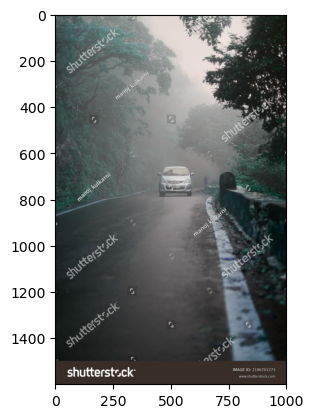

In [29]:
def predict_class_for_image(image_path, model_folder_path, top_5_model_names, class_labels):
    raw_img = cv2.imread(image_path)   # importing image
    raw_img = cv2.resize(raw_img, (100, 100))
    raw_img = np.array(raw_img) # convert image to array
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img / 255

    # Load each model
    models = []

    for i in top_5_model_names:
        model_path = os.path.join(model_folder_path, i)
        model = load_model(model_path)

        probability = model.predict(raw_img)
        classes = probability.argmax(axis=1)
        models.append(classes[0])  # Append the class value, not the array
    
    # Find the most frequent class
    most_frequent_class = Counter(models).most_common(1)[0][0]
    
    predicted_class = class_labels[most_frequent_class]

    return most_frequent_class, predicted_class,models

# Example usage:
top_5_model_names1 = ['train-61.h5', 'train-64.h5', 'train-6.h5', 'train-62.h5', 'train-63.h5', 'train-42.h5', 'train-5.h5', 'train-41.h5', 'train-3.h5']
                        
                        #['finalmodel94_47.h5', 'finalmodel1.h5', 'finalmodel94_04.h5', 'finalmodel89.h5',
                                 #'finalmodel92.h5','train-5.h5','train-63.h5','train-62.h5','train-6.h5']

                        #['train-64.h5', 'train-6.h5', 'train-61.h5', 'train-62.h5', 'train-63.h5']
                        #["road_signs_detectors.h5", "road_signs_detectors-1.h5", "road_signs_detectors-2.h5"]
                        #['finalmodel.h5','finalmodel89.h5']
                        #['finalmodel94_47.h5', 'finalmodel93_75.h5', 'finalmodel94_04.h5']
                        #['finalmodel94_04.h5','finalmodel92.h5']
                        #['finalmodel92.h5','finalmodel89.h5', 'finalmodel94_47.h5']
                        #[ 'finalmodel92.h5', 'finalmodel93_75.h5', 'finalmodel94_04.h5']
                        #['finalmodel94_47.h5', 'finalmodel93_75.h5', 'finalmodel94_04.h5']
image_path = r"C:\Users\Admin\Desktop\Deep Learning\project\carss\staticss\cars\stock-photo-agumbe-ghats-or-hill-station-maharashtra-india-august-a-beautiful-scene-of-a-car-2196701273.jpg"
model_folder_path = r"C:\Users\Admin\Desktop\DL_Project"
class_labels = ['The vehicle Is Ahead Please Be Alert Drive Slow Sharp Turn A Head', 'The Road Is Empty But Drive Slow Sharp Turn A Head']

most_frequent_class, predicted_class,models = predict_class_for_image(image_path, model_folder_path, top_5_model_names1, class_labels)

print('Most Frequent Class:', most_frequent_class)
print()
print(models)
print()
print('Predicted Class:', predicted_class)
print()
print(plt.imshow(cv2.imread(image_path)))


### Checking For The Best Model in 2nd Batch

1/1 [==============================] - 0s 125ms/step
Most Frequent Class: 1

[1]

Predicted Class: The Road Is Empty But Drive Slow Sharp Turn A Head

AxesImage(size=(177, 284))


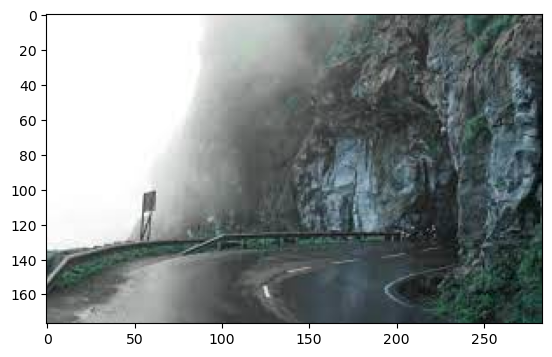

In [26]:
def predict_class_for_image(image_path, model_folder_path, top_5_model_names, class_labels):
    raw_img = cv2.imread(image_path)   # importing image
    raw_img = cv2.resize(raw_img, (100, 100))
    raw_img = np.array(raw_img) # convert image to array
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img / 255

    # Load each model
    models = []

    for i in top_5_model_names:
        model_path = os.path.join(model_folder_path, i)
        model = load_model(model_path)

        probability = model.predict(raw_img)
        classes = probability.argmax(axis=1)
        models.append(classes[0])  # Append the class value, not the array
    
    # Find the most frequent class
    most_frequent_class = Counter(models).most_common(1)[0][0]
    
    predicted_class = class_labels[most_frequent_class]

    return most_frequent_class, predicted_class,models



# Example usage:
top_5_model_names1 =  ['finalmodel89.h5','finalmodel1.h5', 'finalmodel94_04.h5','finalmodel94_47.h5' , 'finalmodel92.h5']
                        #["road_signs_detectors.h5", "road_signs_detectors-1.h5", "road_signs_detectors-2.h5"]
                        #['finalmodel.h5','finalmodel89.h5']
                        #['finalmodel94_47.h5', 'finalmodel93_75.h5', 'finalmodel94_04.h5']
                        #['finalmodel94_04.h5','finalmodel92.h5']
                        #['finalmodel92.h5','finalmodel89.h5', 'finalmodel94_47.h5']
                        #[ 'finalmodel92.h5', 'finalmodel93_75.h5', 'finalmodel94_04.h5']
                        #['finalmodel94_47.h5', 'finalmodel93_75.h5', 'finalmodel94_04.h5']
image_path = r"C:\Users\Admin\Desktop\Deep Learning\project\carss\staticss\roads\download (3).jpg"
model_folder_path = r"C:\Users\Admin\Desktop\DL_Project"
class_labels = ['The vehicle Is Ahead Please Be Alert Drive Slow Sharp Turn A Head', 'The Road Is Empty But Drive Slow Sharp Turn A Head']

most_frequent_class, predicted_class,models = predict_class_for_image(image_path, model_folder_path, top_5_model_names1, class_labels)

print('Most Frequent Class:', most_frequent_class)
print()
print(models)
print()
print('Predicted Class:', predicted_class)
print()
print(plt.imshow(cv2.imread(image_path)))


In [ ]:
trained_model.save("modelf93_33.h5")

In [ ]:
from keras.models import load_model

# Testing Mdels

In [ ]:
'C:\\Users\\Admin\\Desktop\\Deep Learning\\project\\carss\\staticss\\stock-photo-agumbe-ghats-or-hill-station-maharashtra-india-august-a-beautiful-scene-of-a-car-2196701273.jpg'

In [ ]:
preed = footwear.predict(test_x)dd

In [ ]:
preed.argmax(axis=1)

# Test data

### Changing the Images name